# Introductie Pandas

Onderwerpen:
1. demonstraties van enkele belangrijke Pandas methoden
2. bruikbare bronnen en studiemateriaal
3. opdrachten

__Studiestof__:<br>
[VanderPlas] <a href="https://jakevdp.github.io/PythonDataScienceHandbook/" target="_blank">Python Data Science Handbook</a>, O'Reilly, November 2016, <a href="https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html" target="_blank">chapter 3 - Data manipulation with Pandas</a>

## 1. demonstraties van enkele belangrijke Pandas methoden

<strong>Panda</strong> is een Python-bibliotheek die uitgebreide middelen voor gegevensanalyse biedt. Data scientists werken vaak met gegevens die zijn opgeslagen in tabelindelingen zoals .csv, .tsv of .xlsx. 

Panda maakt het gemakkelijk om dergelijke tabelgegevens te laden, verwerken en analyseren met SQL-achtige zoekopdrachten. In samenwerking met Matplotlib en Seaborn biedt Panda een breed scala aan mogelijkheden voor visuele analyse van tabulaire gegevens.

De voornaamste data-structuren in Panda zijn de <strong>Series</strong>- en <strong>DataFrame</strong>-klassen. De eerste is een 1-dimensionale geïndexeerde array van een bepaald vast gegevenstype. Dit laatste is een 2-dimensionale gegevensstructuur - een tabel - waarin elke kolom gegevens van hetzelfde type bevat. 

Je kunt het zien als een woordenboek van Series-instanties. DataFrames zijn geweldig voor het weergeven van echte gegevens: rijen komen overeen met exemplaren (voorbeelden, waarnemingen, enzovoort) en kolommen komen overeen met kenmerken (engels: <i>features</i>) van deze exemplaren.

In [2]:
import numpy as np
import pandas as pd

# NOT RECOMMENED
#import warnings
#warnings.filterwarnings('ignore')

We zullen de belangrijkste methoden in actie demonstreren door de bekende Titanic dataset (train.csv) te analyseren op de overlevingskans van mannen en vrouwen.

__Titanic facts__: https://titanicfacts.net/titanic-survivors/ _gezien op 1-10-2018_

Laten we de gegevens lezen (met Panda's methode `read_csv`) en de eerste 5 regels bekijken met de `head`-methode.

PS. De code-snippets zijn uitvoerig van commentaar voorzien. In de praktijk geef je alleen commentaar bij meerwaarde van de informatie, conform het <strong>DRY</strong> design principe.

In [3]:
# local Titanic dataset
import os

# inlezen uit file data in een panda Dataframe..
path = 'datasets'
df = pd.read_csv(os.path.join(path, 'train.csv'))

# toon de eerste 5 rijen...
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Bedenk dat elke rij overeenkomt met één persoon, een instantie, en de kolommen kenmerken zijn van deze persoon (<i>features</i> van de instantie).

Laten we eens kijken naar enkele kenmerken van de dataset, zoals gegevensdimensionaliteit, functienamen en feature-typen.

In [3]:
# het volgende geeft de dimensies van de dataframe/tabel 
# in kolommen en rijen:
print(df.shape)

(891, 12)


Uitvoer: de tabel bevat 891 rijen en 12 kolommen

Het volgende statement geeft de namen van de kolommen:

In [4]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Met behulp vna de info-methode krijg je algemene informatie over het dataframe:

In [5]:
print( df.info() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


Toelichting:

int64, float64 en object zijn de gegevenstypen van onze functies. We zien dat geen features (kenmerken) logisch zijn (bool), 5 features zijn van het type object en 7 features zijn numeriek. Zie ook wat er achter dtypes-rij staat. 

Met deze info-methode kunnen we ook eenvoudig zien of er ontbrekende waarden zijn (engels: misssing values). Dat zijn waarden van Age, Cabin en Embarked, omdat elke kolom 891 waarnemingen zou moeten hebben, hetzelfde aantal rijen dat we eerder met shape zagen.

Als het nodig is, kan je het data-type van een kolom veranderen met de astype-methode, zoals met volgende statement wordt getoond.

In [6]:
# before: SibSp:int64, see df.head earlier...

# change SibSp to float64
df['SibSp'] = df['SibSp'].astype('float64')
df.head() # show it...


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.0500,NaN,S


In [7]:
# herstel datatype van SibSp
df['SibSp'] = df['SibSp'].astype('int64')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


De describe-methode toont statistische basiskenmerken van elk numeriek kenmerk (int64 en float64-typen), zoals aantal niet-ontbrekende waarden, gemiddelde, standaarddeviatie, bereik (min en max), mediaan (50%), 0.25, en 0.75 percentages.

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


De resultaten tonen 8 rijen voor elke kolom in de dataset. Het eerste getal, `count`, geeft aan hoeveel rijen niet-ontbrekende waarden hebben.

Ontbrekende waarden ontstaan om vele redenen. Bijvoorbeeld, niet van iedereen is de eeftijd (`age`) bekend. Ontbrekende getallen (`missing data`) komt vaak voor en komen we op terug hoe dat aan te pakken is (zie [VanderPlas] chapter 3 - section TODO).

De tweede waarde is het gemiddelde (`mean`), dat is het gemiddelde. Daaronder is `std` de standaarddeviatie, die meet hoe numeriek de waarden zijn verdeeld.

Als je de waarden `min`, `25%`, `50%`, `75%` en `max` wilt interpreteren, stel je dan voor om elke kolom van de laagste tot de hoogste waarde te sorteren. De eerste (kleinste) waarde is de `min`. Als je een kwart door de lijst loopt, vind je een getal dat groter is dan 25% van de waarden en kleiner dan 75% van de waarden. Dat is de `25%`-waarde. De 50e en 75e percentages zijn analoog gedefinieerd en `max` is het grootste getal.

NB. Om statistieken over <strong>niet</strong>-numerieke kenmerken te kunnen zien, moet expliciet in de describe-methode de data-types aangegeven worden in een include-parameter:

In [9]:
df.describe(include=['object',])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Elsbury, Mr. William James",male,1601,G6,S
freq,1,577,7,4,644


Voor categorische (type object) en Booleaanse (type bool) kenmerken (features) kunnen we de methode value_counts gebruiken. Laten we de distributie van Age eens bekijken:

In [10]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50     1
0.92      1
74.00     1
34.50     1
80.00     1
12.00     1
36.50     1
53.00     1
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

Bovenstaande geeft aantallen personen weer van een bepaalde leeftijd. Om een beeld te krijgen van leeftijd percentages, wil je een genormaliseerde verdeling weten. Dat is als volgt:

In [11]:
df['Age'].value_counts(normalize=True)

24.00    0.042017
22.00    0.037815
18.00    0.036415
19.00    0.035014
30.00    0.035014
28.00    0.035014
21.00    0.033613
25.00    0.032213
36.00    0.030812
29.00    0.028011
32.00    0.025210
27.00    0.025210
35.00    0.025210
26.00    0.025210
16.00    0.023810
31.00    0.023810
20.00    0.021008
33.00    0.021008
23.00    0.021008
34.00    0.021008
39.00    0.019608
17.00    0.018207
42.00    0.018207
40.00    0.018207
45.00    0.016807
38.00    0.015406
50.00    0.014006
2.00     0.014006
4.00     0.014006
47.00    0.012605
           ...   
71.00    0.002801
59.00    0.002801
63.00    0.002801
0.83     0.002801
30.50    0.002801
70.00    0.002801
57.00    0.002801
0.75     0.002801
13.00    0.002801
10.00    0.002801
64.00    0.002801
40.50    0.002801
32.50    0.002801
45.50    0.002801
20.50    0.001401
24.50    0.001401
0.67     0.001401
14.50    0.001401
0.92     0.001401
74.00    0.001401
34.50    0.001401
80.00    0.001401
12.00    0.001401
36.50    0.001401
53.00    0

Toelichting: 

Hieruit zie je dat ongeveer 33% van de aanwezige personen, een leeftijd had tussen de 20 en 30 jaar. Het aantal kinderen, jonger dan 10 jaar, was plm. 18%.

### Sorteren

Een DataFrame kan worden gesorteerd op basis van de waarde van een van de variabelen (d.w.z. kolommen). We kunnen bijvoorbeeld sorteren op Age (gebruik oplopend = False om in aflopende volgorde te sorteren):

In [12]:
df.sort_values(by='Age', ascending=False).head() # aflopende leeftijd
#df.sort_values(by='Age', ascending=True).head() # oplopende leeftijd

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


Alternatief, kan je ook sorteren op meerdere kolommen:

In [13]:
df.sort_values(by=['Fare', 'Survived'],
        ascending=[False, True]).head(20)  # toon 20 rijen

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C


### Indexeren en data ophalen

DataFrame kan op verschillende manieren worden geïndexeerd.

Om een enkele kolom te krijgen, kun je de constructie van een `DataFrame['Naam']` gebruiken. 

Laten we dit gebruiken om een vraag over die kolom alleen te beantwoorden, zoals wat is hde gemiddelde leeftijd en tarief van de personen:

In [14]:
print('gemiddeld tarief:', df['Fare'].mean())
print('gemiddelde leeftijd:', df['Age'].mean())

gemiddeld tarief: 32.2042079685746
gemiddelde leeftijd: 29.69911764705882


Interessanter wordt het, als we __Boolean indexering__ gaan gebruiken: `df[P(df['Name'])]`. Het resultaat van een dergelijke indexering is een DataFrame dat alleen bestaat uit rijen die voldoen aan de P-voorwaarde in de kolom Naam. 

Hiermee kan je vragen beantwoorden zoals: 
1. Wat zijn de gemiddelde waarden van de numerieke kenmerken van vrouwen of mannen in het dataframe.
2. Wat zijn de gemiddelde numerieke waarden van een persoon die de ramp overleefd heeft?
3. Wie hebben de ramp overleefd die met goedkoop tarief meegingen?
4. Hoevel personen boven (of onder) een bepaalde leeftijd hebben het overleefd?

In [15]:
# 1. gemiddelde numerieke kenmerken van de vrouwen
df[df['Sex'] == 'female'].mean() 

PassengerId    431.028662
Survived         0.742038
Pclass           2.159236
Age             27.915709
SibSp            0.694268
Parch            0.649682
Fare            44.479818
dtype: float64

In [16]:
# 1. gemiddelde numerieke kenmerken van de mannen
df[df['Sex'] == 'male'].mean() 


PassengerId    454.147314
Survived         0.188908
Pclass           2.389948
Age             30.726645
SibSp            0.429809
Parch            0.235702
Fare            25.523893
dtype: float64

In [17]:
# 2. gemiddelde numerieke kenmerken van diegene die de ramp overleefd hebben.
df[df['Survived'] == 1].mean()


PassengerId    444.368421
Survived         1.000000
Pclass           1.950292
Age             28.343690
SibSp            0.473684
Parch            0.464912
Fare            48.395408
dtype: float64

In [18]:
# 3. wie hebben de ramp overleefd die met een goedkoop tarief meegingen?
df[ (df['Survived'] == 1) & (df['Fare'] < 8.0000) ]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,NaN,Q
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,NaN,Q
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S


In [19]:
# 4. aantal personen van boven de 60 die de ramp overleefd hebben.
df[ (df['Survived'] == 1) & (df['Age'] > 60) ].count()
#df[ (df['Survived'] == 1) & (df['Age'] > 60) ] # de personen


PassengerId    5
Survived       5
Pclass         5
Name           5
Sex            5
Age            5
SibSp          5
Parch          5
Ticket         5
Fare           5
Cabin          3
Embarked       4
dtype: int64

DataFrames kunnen worden geïndexeerd op kolomnaam (label) of rijnaam (index) of op het serienummer van een rij. De __`loc`__-methode wordt gebruikt voor indexering op naam, terwijl __`iloc`__-methode wordt gebruikt voor indexering op nummer.

In het eerste geval zouden we zeggen _geef ons de waarden van de rijen met index van 0 tot 5 (inclusief) en kolommen gelabeld van Age tot Fare (inclusief)_, en in het tweede geval zouden we zeggen _geef ons de waarden van de eerste vijf rijen in de eerste drie kolommen_, zoals in de typische Python-slice: de maximale waarde is niet inbegrepen.

zie [VanderPlas] chapter 3 - section __Indexers: loc, iloc, and ix__

In [20]:
df.loc[0:5, 'Age':'Fare'] 
# rij index 0 t/m 5 and kolom 'Age' t/m 'Fare'

,Age,SibSp,Parch,Ticket,Fare
0,22.0,1,0,A/5 21171,7.2500
1,38.0,1,0,PC 17599,71.2833
2,26.0,0,0,STON/O2. 3101282,7.9250
3,35.0,1,0,113803,53.1000
4,35.0,0,0,373450,8.0500
5,NaN,0,0,330877,8.4583


In [21]:
df.iloc[0:5, 0:3] 
# eerste 5 rijen (index 0 tot 5) and eerste 3 kolommen ('PassengerId tot Pclass')


,PassengerId,Survived,Pclass
0,1,0,3
1,2,1,1
2,3,1,3
3,4,1,1
4,5,0,3


In [22]:
# idemdito resultaat met loc-memthode:
df.loc[0:4, 'PassengerId':'Pclass'] 
# TODO: vewijderen - dubbel op

,PassengerId,Survived,Pclass
0,1,0,3
1,2,1,1
2,3,1,3
3,4,1,1
4,5,0,3


Als we de eerste of de laatste regel van het dataframe nodig hebben, kunnen we het construct `df[:1]` of `df[-1:]` gebruiken:

In [23]:
df[:1] # 1ste passagier 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [24]:
df[-1:] # laatste passagier

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#### Functies toepassen op cellen, kolommen en rijen

Gebruik de `apply`-methode om functies toe te passen op elke kolom. De `apply`-methode kan ook worden gebruikt om een functie toe te passen op elke rij. Geef dan `axis=1` op om dit te doen. Lambda-functies zijn erg handig in dergelijke scenario's. 

Als we bijvoorbeeld alle namen willen selecteren die beginnen met H, kunnen we dit als volgt doen:

In [25]:
df[df['Name'].apply(lambda name: name[0] == 'H')].head()

# filter alle rijen waarvan de Name begint met een 'H' en 
# toon de eerste 5 personen.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S


De `map` of `replace`-methode kan worden gebruikt om waarden in een kolom te vervangen. Dit doen we door een dictionary van de vorm {oude_waarde: nieuwe_waarde} als argument door te geven. 

__Voorbeeld__: vervang de waarden van kolom 'Survived' door een boolean True/False. Dit doe je als de nieuwe data-type beter in de berekeningen past.

NB. Realiseer je dat je de DataFrame-waarde in-memory verandert, herstel kan altijd door opnieuw het CSV-bestand in te lezen.

In [26]:
d = {0 : False, 1 : True} # vervangingstabel

df['Survived'] = df['Survived'].map(d)
df.head()
#df.info() # overzicht van de data-types

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
## herstel Dataframe van CSV
#import os
path = 'datasets'
df = pd.read_csv(os.path.join(path, 'train.csv'))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Groepering

Over het algemeen gaat het groeperen van gegevens in Panda's als volgt:

`df.groupby(by=grouping_columns)[columns_to_show].function()`

1. De `groupby`-methode verdeelt de `grouping_columns` op basis van hun waarden. Ze worden een nieuwe index in het resulterende dataframe.
2. Vervolgens worden de interessante kolommen geselecteerd (`columns_to_show`).
3. Ten slotte worden één of meerdere functies toegepast op de verkregen groepen per geselecteerde kolommen.

Zie [VanderPlas] chapter 3 - section __GroupBy: Split, Apply, Combine__.

Hier is een voorbeeld waarin we de gegevens groeperen volgens de waarden van de variabele `Survived` en statistieken weergeven van drie kolommen in elke groep.

In [28]:
columns_to_show = ['Age', 'Fare']
df.groupby(['Survived'])[columns_to_show].describe(percentiles=[])

Age                                           Fare             \
          count       mean        std   min   50%   max  count       mean   
Survived                                                                    
0         424.0  30.626179  14.172110  1.00  28.0  74.0  549.0  22.117887   
1         290.0  28.343690  14.950952  0.42  28.0  80.0  342.0  48.395408   

                                          
                std  min   50%       max  
Survived                                  
0         31.388207  0.0  10.5  263.0000  
1         66.596998  0.0  26.0  512.3292

Bij exploratory dataonderzoek horen het maken van eenvoudige grafische schemas. In het boek [VanderPlas] vindt je in __chapter 4 Visualisation with Matplotlib__ meer informatie over de libraries `Seaborn` en `Matplotlib`.

Hier een paar eenvoudige grafieken met `Seaborn`.

In [29]:
# some imports to set up plotting 
import matplotlib.pyplot as plt
# pip install seaborn 
import seaborn as sns

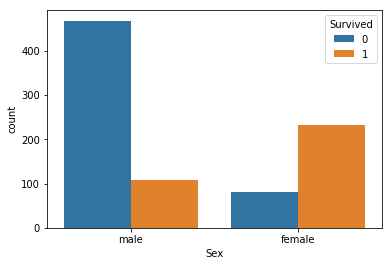

In [30]:
# teken een histogram van de kolom 'Survived' op basis van 'Female/Male' van de passagier.
sns.countplot(x='Sex', hue='Survived', data=df);


Uit de grafiek blijkt, wederom, dat er mee vrouwen dan mannen de ramp hebben overleefd.

Door diverse grafieken te maken, krijg je al snel meer inzicht. Bijvoorbeeld, de verdeling in leeftijd van diegene die de ramp hebben overleefd (rode-lijn) of niet-overleefd (blauwe lijn). 

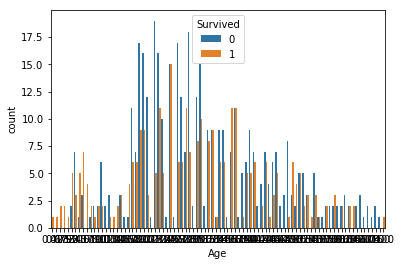

In [31]:
sns.countplot(x='Age', hue='Survived', data=df)

Met een naive berekening (`percentage = aantal overlevenden / totaal aantal`) kunnen we het overlevingspercentage van vrouwen en mannen bepalen:

In [5]:
# data-set: 
# http://www.kaggle.com/c/titanic-gettingStarted/download/train.csv
# requires to be logged in with your Kaggel account!

#from pandas import *
import pandas as pd

# Titanic dataset
import os
path = 'datasets'
df = pd.read_csv(os.path.join(path, 'train.csv'))
df.head()

male = df[df.Sex == 'male']
female = df[df.Sex =='female']

womens_survival_rate = float(sum(female.Survived))/len(female)
male_survival_rate = float(sum(male.Survived))/len(male)

print('womens_survival_rate:', womens_survival_rate)
print('male_survival_rate:', male_survival_rate)

womens_survival_rate: 0.7420382165605095
male_survival_rate: 0.18890814558058924


## Opdrachten pandas

**datasets**: zie Github Machine Learning


### Opdracht 1

#### Leerdoel
Het inlezen van een data-set op basis van een URL, en het verkennen ervan. Gebruik introductie Pandas en de chapters numpy en pandas uit [VanderPlas] om de mogelijkheden te bestuderen. 

De URL http://winterolympicsmedals.com/ bevat overzichten van de medailles gewonnen door verschillende landen in de diverse Winterspelen sporten.

1. Met een webbrowser open de URL: http://winterolympicsmedals.com/medals.csv. Een CSV-file wordt gedownload. Open het met Excel en bekijk het even om een indruk te krijgen wat erin staat. 

2. Lees de gedowloade dataset in met de methode `read_csv()` uit module `pandas`.
> - Lees ook de CSV-file in met `read_csv()` waarbij je de gegeven URL gebruikt.

3. Toon de eerste 10 rijen van het ingelezen dataframe op het computerscherm.

4. Toon kenmerken van het dataframe, zoals dimensies, kolom namen en datatypes. 

5. Toon karakteristieken van het dataframe met de `describe`-methode. 

6. Toon een gesorteerde lijst op het scherm. Bepaal zelf op welk kenmerk (minimaal twee).

7. Welk land heeft de meeste medailles gewonnen? Wie de meeste gouden? Wie de meeste zilveren? Vergelijk met het overzicht op http://winterolympicsmedals.com/

8. Schrijf het dataframe naar een CSV of Excel bestand met Pandas methoden. Zet de bestanden in een subfolder.


In [4]:
# JOUW OPLOSSING OPDRACHT 1 - olympic medals
# dataset
csv_file = 'medals.csv' 


### Opdracht 2

Gegeven de dataset `telecom_curn.csv` op URL `https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/` (of onze github repository).

NB. 'churn users': weglopende (churn=1/True) of loyale (churn=0/False) gebruikers.

1. Verken de karakteristieken en data-typen van deze datset met pandas methoden, die de revue zijn gepasserd en beantwoordt dan de volgende vragen:

2. Wat is het aandeel van weglopende gebruikers in het dataframe?

Bij de volgende opdrachten, maak je gebruik van Boolean indexing met een kolom __`df[P(df['Name'])]`__.

3. Wat zijn de gemiddelde waarden van numerieke kenmerken (features) voor weglopende gebruikers?

4. Hoeveel tijd (gemiddeld) besteden de weglopende gebruikers overdag aan de telefoon?

5. Wat is de maximale lengte van internationale gesprekken tussen loyale gebruikers (`Churn == 0`) die geen internationaal plan hebben?

6. Maak een histogram grafiek met `Seaborn`, zoals bij de Titanic, waarbij je laat zien wat de relatie is tussen _churn rate_ en het kenmerk `International plan`. Wat is een conclusie die je uit de grafiek kan trekken?

7. Idemdito voor _churn rate_ en kenmerk _Customer service calls_ (oproepen aan de klantenservice).

8. Stel dat we willen zien hoe de waarnemingen in onze steekproef worden verdeeld in de context van twee variabelen: `Churn` en `International plan`. Hiertoe kunnen we een kruistabel maken met behulp van de `crosstab`-methode:
`pd.crosstab(df['Churn'], df['International plan'])`
en een genormaliseerde kruistabel met
`pd.crosstab(df['Churn'], df['International plan'], normalize=True)`
Welke conclusie kun je uit deze kruistabellen maken?


In [5]:
# JOUW OPLOSSING OPDRACHT 2 - telecom-churn
csv_file = 'telecom_churn.csv'
